# Instruction
Plase use <b>Python 3</b> in Jupyter Notebook.

This lab focuses on classifcation and prediction. We will practice classification methods on a real world wetland mapping dataset. Each data sample contains several numeric features and a binary class label (0 for dry land, 1 for wetland).

<b>Requirement</b>
- <font color=red>Plese upload your Jupyter Notebook with required Data files and Python script files all in the SAME zipped FOLDER</font>

- Please MAKE SURE your codes run smoothly without bugs in Jupyter Notebook with Python 3.
    
- <font color=red>Codes with bugs or errors that cannot run through in Jupyter notebook will be graded as ZERO for that part.</font>

## Statement of Contribution

We both tried the homework on our own. Sumanthra was responsible for developing the programming solutions and the extra credit problem. Karthik completed the written assignment. Both partners were involved in reviewing the code and written components.

In [3]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier # Bagging Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.linear_model import LogisticRegression # Import Logistic Regression Classifier
from sklearn.svm import SVC # Import SVM classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## Data loading
Please use the following codes to load the data. The training and test data are both saved in common separated values (CSV) format. The last column is class label.

PLEASE RUN THE CODES BELOW.

In [7]:
#note: class 0 for dry land, class 1 for wetland
col_names = ['near infra red ', 'red', 'green', 'blue', 'class']
features =  ['near infra red ', 'red', 'green', 'blue']

# load dataset
train_dat = pd.read_csv("train.csv", header=None, names=col_names)
print(train_dat.head())

test_dat = pd.read_csv("test.csv", header=None, names=col_names)
print(test_dat.head())

# COMPLETE CODES BELOW, compute training features X_train, training labels Y_train
X_train = train_dat.drop('class', axis='columns')
Y_train = train_dat['class']

# COMPLETE CODES BELOW, compute test features X_test, test labels Y_test
X_test = test_dat.drop('class', axis='columns')
Y_test = test_dat['class']

   near infra red   red  green  blue  class
0              123  132    115   133      0
1              152  150    119   187      1
2              169  166    143   192      1
3               55   49     43    97      0
4              141  135    117   181      1
   near infra red   red  green  blue  class
0              137  140    129   150      0
1              169  162    140   193      1
2              124  110     89   162      1
3              105  104     99   153      1
4              105  102     88   173      1


class
0    560
1    440
Name: count, dtype: int64
['Dryland', 'Wetland'] [560 440]


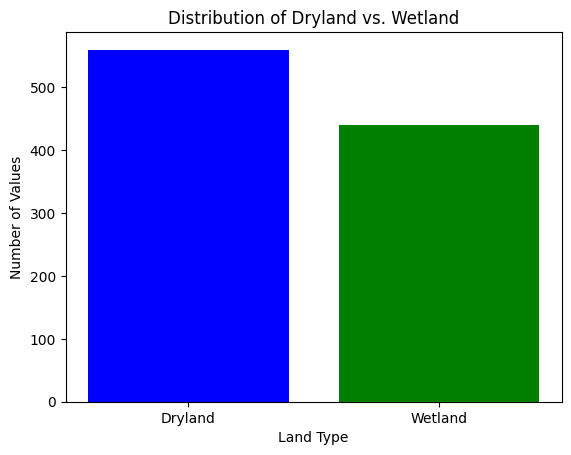

In [8]:
import matplotlib.pyplot as plt

counts = train_dat['class'].value_counts()
print(counts)


# Get the labels and counts from the value_counts() result
categories = counts.index
values = counts.values

# Map numerical labels to meaningful names
labels = ['Dryland' if landtype == 0 else 'Wetland' for landtype in categories]
print(labels,values)

# Create the bar plot
plt.bar(labels, values, color=['blue', 'green'])

# Add labels and a title for clarity
plt.xlabel('Land Type')
plt.ylabel('Number of Values')
plt.title('Distribution of Dryland vs. Wetland')

# Display the plot
plt.show()


## Part 1: Evaluate the performance of decision tree

Run the codes below to train a decision tree, and make predictions on test samples

In [9]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt = dt.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = dt.predict(X_test)

Run the codes below to compute the "Overall Accuracy", as well as Precision, Recall, and F-score for the Wetland class (class 1)

In [10]:

# accuracy = metrics.accuracy_score(Y_train, Y_pred)
# precision_wet = metrics.precision_score(Y_train, Y_pred)
# recall_wet = metrics.recall_score(Y_train, Y_pred)
# F_wet = metrics.f1_score(Y_train, Y_pred)

# print('Metrics of Model on Training Data')
# print(accuracy)
# print(precision_wet)
# print(recall_wet)
# print(F_wet)


# Fill in codes to calculate the values below; You can add any codes, but don't change the variable names

accuracy = metrics.accuracy_score(Y_test, Y_pred)

precision_wet = metrics.precision_score(Y_test, Y_pred)

recall_wet = metrics.recall_score(Y_test, Y_pred)

F_wet = metrics.f1_score(Y_test, Y_pred)

print(accuracy)
print(precision_wet)
print(recall_wet)
print(F_wet)

0.783
0.7390350877192983
0.774712643678161
0.7564534231200898


<font color=red>ANSWER THE QUESTION BELOW.</font> How do you think about the performance shown by different metrics above. Is accuracy a good metric to reflect classification performance? Why? You can discuss your answer as a string. And print it out.

In [11]:
#MY ANSWER IS xxxxx
ans = '''
MY Answer: Accuracy is giving a decent representation of the performane since the wetland and dryland classes are not misbalanced by A heavy margin.
But accuracy alone is not the best metric because accuracy could look high even if the model performs poorly on a minority class,
Precision, recall, and F1-score give a clearer picture of performance.
In environmental classification tasks, recall (sensitivity) for wetlands is particularly important, since missing wetlands can have serious ecological consequences.

'''
print(ans)


MY Answer: Accuracy is giving a decent representation of the performane since the wetland and dryland classes are not misbalanced by A heavy margin.
But accuracy alone is not the best metric because accuracy could look high even if the model performs poorly on a minority class, 
Precision, recall, and F1-score give a clearer picture of performance. 
In environmental classification tasks, recall (sensitivity) for wetlands is particularly important, since missing wetlands can have serious ecological consequences.




## Part 2: Overfitting issues
<font color=red>PLEASE COMPLETE TEH CODES BELOW.</font> Please re-train the decision tree model with a smaller number of training samples. <font color=red>DO NOT change the tree model parameters (e.g., minimum leaf node size) from Part 1</font>

In [12]:
# Re-run the training and testing based on a smaller training set (smalltrain.csv).
#note: class 0 for dry land, class 1 for wetland
col_names = ['near infra red ', 'red', 'green', 'blue', 'class']
features =  ['near infra red ', 'red', 'green', 'blue']

# load dataset
train_dat = pd.read_csv("smalltrain.csv", header=None, names=col_names)
print(train_dat.head())

test_dat = pd.read_csv("test.csv", header=None, names=col_names)
print(test_dat.head())

# COMPLETE CODES BELOW, compute training features X_train, training labels Y_train
X_train = train_dat.drop('class', axis='columns')
Y_train = train_dat['class']

# COMPLETE CODES BELOW, compute test features X_test, test labels Y_test
X_test = test_dat.drop('class',axis='columns')
Y_test = test_dat['class']

# Create Decision Tree classifer object
dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt = dt.fit(X_train,Y_train)

# Re-evaluate the trained model on test data, print out accuracy, precision, recall, F-score
Y_pred = dt.predict(X_train)
accuracy = metrics.accuracy_score(Y_train, Y_pred)
precision_wet = metrics.precision_score(Y_train, Y_pred)
recall_wet = metrics.recall_score(Y_train, Y_pred)
F_wet = metrics.f1_score(Y_train, Y_pred)

print('Metrics of Model on Training Data')
print(accuracy)
print(precision_wet)
print(recall_wet)
print(F_wet)

Y_pred = dt.predict(X_test)
accuracy = metrics.accuracy_score(Y_test,Y_pred)
precision_wet = metrics.precision_score(Y_test,Y_pred)
recall_wet = metrics.recall_score(Y_test,Y_pred)
F_wet = metrics.f1_score(Y_test,Y_pred)

print('Metrics of Model on Test Data')
print(accuracy)
print(precision_wet)
print(recall_wet)
print(F_wet)

   near infra red   red  green  blue  class
0              143  150    145   156      0
1              151  143    120   183      1
2              100   98     86   156      0
3              140  137    119   182      0
4              147  147    138   160      0
   near infra red   red  green  blue  class
0              137  140    129   150      0
1              169  162    140   193      1
2              124  110     89   162      1
3              105  104     99   153      1
4              105  102     88   173      1
Metrics of Model on Training Data
1.0
1.0
1.0
1.0
Metrics of Model on Test Data
0.697
0.6586538461538461
0.6298850574712643
0.6439482961222092


<font color=red>ANSWER THE QUESTION BELOW.</font> What do you observe when the number of training samples decrese? Is this overfitting or underfitting?

In [13]:
#MY Answer: xxxxxxxxxxx
ans = '''
MY Answer: The model is overfitting because, the training accuracy and other metrics are 1 but when trying to generalise,
the test accuracy,precision,recall,f1 scores are much lower. This indicates that the decision tree has overfitted
over the training data
'''

print(ans)


MY Answer: The model is overfitting because, the training accuracy and other metrics are 1 but when trying to generalise,
the test accuracy,precision,recall,f1 scores are much lower. This indicates that the decision tree has overfitted
over the training data



We now do another experiment to mitigate the effect of overfitting by decreasing the model complexity. We keep using the small training data (smalltrain.csv) that leads to overfitting. We decrease model complexity by having a larger minimum leaf node size ("min_sample_split=30").

In [14]:
col_names = ['near infra red ', 'red', 'green', 'blue', 'class']
features =  ['near infra red ', 'red', 'green', 'blue']

# load dataset
train_dat = pd.read_csv("smalltrain.csv", header=None, names=col_names)
print(train_dat.head())

test_dat = pd.read_csv("test.csv", header=None, names=col_names)
print(test_dat.head())

# COMPLETE CODES BELOW, compute training features X_train, training labels Y_train
X_train = train_dat.drop('class', axis='columns')
Y_train = train_dat['class']

# COMPLETE CODES BELOW, compute test features X_test, test labels Y_test
X_test = test_dat.drop('class', axis='columns')
Y_test = test_dat['class']

# Create Decision Tree classifer object
dt_simple = DecisionTreeClassifier(min_samples_split=30) ### Make model much simplier by requiring 30 samples to split

# Train Decision Tree Classifer
dt_simple = dt_simple.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = dt_simple.predict(X_test)


accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision_wet = metrics.precision_score(Y_test, Y_pred)
recall_wet = metrics.recall_score(Y_test, Y_pred)
F_wet = metrics.f1_score(Y_test, Y_pred)


print('Metrics of Model on Test Data')
print(accuracy)
print(precision_wet)
print(recall_wet)
print(F_wet)

   near infra red   red  green  blue  class
0              143  150    145   156      0
1              151  143    120   183      1
2              100   98     86   156      0
3              140  137    119   182      0
4              147  147    138   160      0
   near infra red   red  green  blue  class
0              137  140    129   150      0
1              169  162    140   193      1
2              124  110     89   162      1
3              105  104     99   153      1
4              105  102     88   173      1
Metrics of Model on Test Data
0.757
0.6889763779527559
0.8045977011494253
0.7423117709437964


<font color=red>ANSWER THE QUESTION BELOW.</font> Compare the results above with the results from the beginning of Part 2 (smalltrain.csv with the original decision tree without decreasing model complexity), what did you observe?

In [15]:
#MY ANSWER IS xxxxx
ans = '''
MY Answer:
By decreasing model complexity with min_samples_split=30, we can see that the test performance improved compared to the overfitted model.
The regularized model shows more balanced performance with 0.757 test accuracy, which is better than the overfitted version.
Also, the regularized model achieved much higher recall (0.807 vs 0.667), meaning it's better at correctly identifying wetlands.
The improvement in F1-Score(0.743 vs 0.668) also shows better overall balance between precision and recall.
This demonstrates that reducing model complexity can help mitigate overfitting and improve generalization across all evaluation metrics.
'''
print(ans)


MY Answer:
By decreasing model complexity with min_samples_split=30, we can see that the test performance improved compared to the overfitted model. 
The regularized model shows more balanced performance with 0.757 test accuracy, which is better than the overfitted version.
Also, the regularized model achieved much higher recall (0.807 vs 0.667), meaning it's better at correctly identifying wetlands. 
The improvement in F1-Score(0.743 vs 0.668) also shows better overall balance between precision and recall.
This demonstrates that reducing model complexity can help mitigate overfitting and improve generalization across all evaluation metrics.



## Part 3: Compare different model on the same test data
In this part, you will train other types of models and evaluate on the test data. You will compare their classification performance.

<font color=red>PLEASE COMPLETE TEH CODES BELOW.</font> PLEASE USE THE SAME TRAINING AND TEST DATA as in Part 1.

In [16]:
col_names = ['near infra red ', 'red', 'green', 'blue', 'class']
features =  ['near infra red ', 'red', 'green', 'blue']

# load dataset
train_dat = pd.read_csv("train.csv", header=None, names=col_names)
print(train_dat.head())

test_dat = pd.read_csv("test.csv", header=None, names=col_names)
print(test_dat.head())

# COMPLETE CODES BELOW, compute training features X_train, training labels Y_train
X_train = train_dat.drop('class', axis='columns')
Y_train = train_dat['class']

# COMPLETE CODES BELOW, compute test features X_test, test labels Y_test
X_test = test_dat.drop('class', axis='columns')
Y_test = test_dat['class']

# train a logistic regression model; e.g., use the LogisticRegression model in Scikit-Learn.
# using parameter "solver='liblinear'"
lr = LogisticRegression(solver='liblinear')
lr = lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

# evalute the logistic regression model on test data
accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision_wet = metrics.precision_score(Y_test, Y_pred)
recall_wet = metrics.recall_score(Y_test, Y_pred)
F_wet = metrics.f1_score(Y_test, Y_pred)

print(accuracy)
print(precision_wet)
print(recall_wet)
print(F_wet)


   near infra red   red  green  blue  class
0              123  132    115   133      0
1              152  150    119   187      1
2              169  166    143   192      1
3               55   49     43    97      0
4              141  135    117   181      1
   near infra red   red  green  blue  class
0              137  140    129   150      0
1              169  162    140   193      1
2              124  110     89   162      1
3              105  104     99   153      1
4              105  102     88   173      1
0.757
0.7307692307692307
0.6988505747126437
0.7144535840188014


In [17]:
# train a Support Vector Machine (SVM) model, e.g., the SVC model in Scikit-Learn, choose parameters approprioately

# Please find the SVC function in Scikit-Learn, use parameters "gamma='scale', C=100"
clf = SVC(gamma='scale', C=100)
clf.fit(X_train, Y_train)

# evalute the Support Vector Machine (SVM) model on test data
Y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision_wet = metrics.precision_score(Y_test, Y_pred)
recall_wet = metrics.recall_score(Y_test, Y_pred)
F_wet = metrics.f1_score(Y_test, Y_pred)

print(accuracy)
print(precision_wet)
print(recall_wet)
print(F_wet)

0.81
0.7406679764243614
0.8666666666666667
0.798728813559322


<font color=red>ANSWER THE QUESTION BELOW.</font> How do you compare the results from different models above with decision tree?

In [18]:
ans = '''
My Answer: Comparing the different models on the test data:
1. Decision Tree (Part 1 i.e before overfitting): 0.782 accuracy, 0.737 precision, 0.775 recall, 0.756 F1
2. Logistic Regression: 0.757 accuracy, 0.731 precision, 0.699 recall, 0.714 F1
3. Support Vector Machine: 0.810 accuracy, 0.741 precision, 0.867 recall, 0.799 F1

The SVM model performed best overall with the highest accuracy (0.810) and F1-score (0.799).
SVM also had the best recall (0.867) for wetland detection, which is important for environmental applications.
The decision tree performed moderately well, while logistic regression had the lowest performance among the three.
'''

print(ans)


My Answer: Comparing the different models on the test data:
1. Decision Tree (Part 1 i.e before overfitting): 0.782 accuracy, 0.737 precision, 0.775 recall, 0.756 F1
2. Logistic Regression: 0.757 accuracy, 0.731 precision, 0.699 recall, 0.714 F1  
3. Support Vector Machine: 0.810 accuracy, 0.741 precision, 0.867 recall, 0.799 F1

The SVM model performed best overall with the highest accuracy (0.810) and F1-score (0.799).
SVM also had the best recall (0.867) for wetland detection, which is important for environmental applications.
The decision tree performed moderately well, while logistic regression had the lowest performance among the three.



## Part 4: Ensemble learning
In this part, you will run several ensemble learning of decision trees, including bagging and random forest. For random forest, you can directly call it as a separate model from library.

<font color=red>PLEASE COMPLETE CODES BELOW</font>. PLEASE USE THE ORIGINAL TRAINING AND TEST DATA in Part 1.

In [24]:
#note: class 0 for dry land, class 1 for wetland
col_names = ['near infra red ', 'red', 'green', 'blue', 'class']
features =  ['near infra red ', 'red', 'green', 'blue']

# load dataset
train_dat = pd.read_csv("train.csv", header=None, names=col_names)
print(train_dat.head())

test_dat = pd.read_csv("test.csv", header=None, names=col_names)
print(test_dat.head())

# COMPLETE CODES BELOW, compute training features X_train, training labels Y_train
X_train = train_dat.drop('class', axis='columns')
Y_train = train_dat['class']

# COMPLETE CODES BELOW, compute test features X_test, test labels Y_test
X_test = test_dat.drop('class', axis='columns')
Y_test = test_dat['class']

# please train bagging of decision tree, using BaggingClassifier with default parameters
clf = BaggingClassifier()
clf = clf.fit(X_train, Y_train)

# please evaluate it on the test data
Y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision_wet = metrics.precision_score(Y_test, Y_pred)
recall_wet = metrics.recall_score(Y_test, Y_pred)
F_wet = metrics.f1_score(Y_test, Y_pred)

print(accuracy)
print(precision_wet)
print(recall_wet)
print(F_wet)

   near infra red   red  green  blue  class
0              123  132    115   133      0
1              152  150    119   187      1
2              169  166    143   192      1
3               55   49     43    97      0
4              141  135    117   181      1
   near infra red   red  green  blue  class
0              137  140    129   150      0
1              169  162    140   193      1
2              124  110     89   162      1
3              105  104     99   153      1
4              105  102     88   173      1
0.811
0.7900943396226415
0.7701149425287356
0.779976717112922


In [25]:
# please train a random forest, using RandomForestClassifier function with paramters "n_estimators=50"
clf = RandomForestClassifier(n_estimators=50)
clf = clf.fit(X_train, Y_train)

# please evaluate it on the test data
Y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision_wet = metrics.precision_score(Y_test, Y_pred)
recall_wet = metrics.recall_score(Y_test, Y_pred)
F_wet = metrics.f1_score(Y_test, Y_pred)

print(accuracy)
print(precision_wet)
print(recall_wet)
print(F_wet)

0.809
0.7772727272727272
0.7862068965517242
0.7817142857142857


In [17]:
# print(Y_pred.head())

PLEASE ANSWER THE QUESTION BELOW. How do you compare different ensemble methods? Which one has the best performance?

In [26]:
ans = '''
MY ANSWER:
Bagging achieves higher accuracy (0.811 vs. 0.809) and precision (0.790 vs. 0.777), meaning it is slightly better at avoiding false positives.
However, Random Forest achieves higher recall (0.786 vs. 0.770) and a marginally better F1 score (0.782 vs. 0.780), indicating it is
more effective at correctly identifying positives while maintaining a balanced trade-off between precision and recall.
Since the F1 score is generally the best measure of overall performance, Random Forest can be considered the stronger method in this comparison,
though the difference is minimal.
'''

print(ans)


MY ANSWER:
Bagging achieves higher accuracy (0.811 vs. 0.809) and precision (0.790 vs. 0.777), meaning it is slightly better at avoiding false positives. 
However, Random Forest achieves higher recall (0.786 vs. 0.770) and a marginally better F1 score (0.782 vs. 0.780), indicating it is 
more effective at correctly identifying positives while maintaining a balanced trade-off between precision and recall. 
Since the F1 score is generally the best measure of overall performance, Random Forest can be considered the stronger method in this comparison, 
though the difference is minimal.



## Part 5 (EXTRA CREDIT): Implement your own classifier (logistic regression)

You should implement your logistic regression model: a training function and a test function. Save your source codes in 'myLR.py'. Put the python script in the same dirctory of this Jupyter Notebook. Load the scripts so that you can call your own training and prediction functions. Then evaluate the results on test data. Compare your results from the results from built-in logistic regression library in Part 4. Please use the same training data and test data as Part 1. Please make sure you print out the accuracy, confusion matrix, precision, recall, F-score.

<b>Requirement</b>

- Your codes should run through without bugs. Codes with bugs in Jupyter notebook running will NOT be graded.
    
- You CANNOT copy a same python codes from online for this question. It will be treated as cheating.


In [ ]:

import numpy as np
import pandas as pd

class MyLR:
    """
    Enhanced Logistic Regression with regularization and adaptive learning
    """

    def __init__(self, learning_rate=0.5, max_iterations=3000, tolerance=1e-8, reg_lambda=0.01):
        """
        Initialize with improved hyperparameters

        Parameters:
        learning_rate: Higher initial learning rate for faster convergence
        max_iterations: More iterations for better optimization
        tolerance: Convergence threshold
        reg_lambda: L2 regularization parameter to prevent overfitting
        """
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.reg_lambda = reg_lambda
        self.weights = None
        self.bias = None
        self.cost_history = []

    def sigmoid(self, z):

        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def add_polynomial_features(self, X):
        
        # Add polynomial features (squares and interactions) to capture non-linear patterns
        
        X_poly = X.copy()
        n_features = X.shape[1]

        # Add squared terms
        for i in range(n_features):
            X_poly = np.column_stack([X_poly, X[:, i] ** 2])

        # Add interaction terms between features
        for i in range(n_features):
            for j in range(i+1, n_features):
                X_poly = np.column_stack([X_poly, X[:, i] * X[:, j]])

        return X_poly

    def fit(self, X, y):
        """
        Train with feature engineering and adaptive learning rate
        """
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values

        # Add polynomial features for better non-linear modeling
        X = self.add_polynomial_features(X)

        # Normalize features
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        self.std_ = np.where(self.std_ == 0, 1, self.std_)
        X_normalized = (X - self.mean_) / self.std_

        n_samples, n_features = X_normalized.shape

        # Better initialization using Xavier/He initialization
        np.random.seed(42)
        self.weights = np.random.normal(0, np.sqrt(2.0/n_features), n_features)
        self.bias = 0.0

        # Adaptive learning rate
        initial_lr = self.learning_rate

        # Gradient descent with momentum
        velocity_w = np.zeros(n_features)
        velocity_b = 0.0
        momentum = 0.9

        prev_cost = float('inf')
        patience = 0
        best_weights = self.weights.copy()
        best_bias = self.bias
        best_cost = float('inf')

        for i in range(self.max_iterations):
            # Forward pass
            linear_pred = np.dot(X_normalized, self.weights) + self.bias
            predictions = self.sigmoid(linear_pred)

            # Compute cost with L2 regularization
            cost = self.cross_entropy_loss(y, predictions)
            reg_cost = cost + (self.reg_lambda / (2 * n_samples)) * np.sum(self.weights ** 2)
            self.cost_history.append(reg_cost)

            # Tracking the best model
            if reg_cost < best_cost:
                best_cost = reg_cost
                best_weights = self.weights.copy()
                best_bias = self.bias
                patience = 0
            else:
                patience += 1

            # Compute gradients with L2 regularization
            dw = (1/n_samples) * np.dot(X_normalized.T, (predictions - y))
            dw += (self.reg_lambda / n_samples) * self.weights  # L2 regularization
            db = (1/n_samples) * np.sum(predictions - y)

            # Momentum update
            velocity_w = momentum * velocity_w - self.learning_rate * dw
            velocity_b = momentum * velocity_b - self.learning_rate * db

            self.weights += velocity_w
            self.bias += velocity_b

            # Adaptive learning rate decay
            if i > 0 and i % 500 == 0:
                self.learning_rate *= 0.95

            # Check convergence
            if abs(prev_cost - reg_cost) < self.tolerance:
                print(f"Converged after {i+1} iterations")
                break

            # Early stopping if no improvement
            if patience > 200:
                print(f"Early stopping at iteration {i+1}")
                self.weights = best_weights
                self.bias = best_bias
                break

            prev_cost = reg_cost

            if (i + 1) % 500 == 0:
                print(f"Iteration {i+1}, Cost: {reg_cost:.6f}, LR: {self.learning_rate:.4f}")

        # Use best model found
        self.weights = best_weights
        self.bias = best_bias

        return self

    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        cost = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return cost

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values

        # Apply same feature engineering
        X = self.add_polynomial_features(X)
        X_normalized = (X - self.mean_) / self.std_
        linear_pred = np.dot(X_normalized, self.weights) + self.bias
        probabilities = self.sigmoid(linear_pred)
        # Can tune threshold if needed (default 0.5)
        predictions = (probabilities >= 0.5).astype(int)

        print(f"Probability range: [{probabilities.min():.3f}, {probabilities.max():.3f}]")
        print(f"Predictions distribution: {np.bincount(predictions)}")

        return predictions
        

In [4]:
# Load data
col_names = ['near infra red ', 'red', 'green', 'blue', 'class']
features =  ['near infra red ', 'red', 'green', 'blue']

# load dataset
train_dat = pd.read_csv("train.csv", header=None, names=col_names)
print(train_dat.head())

test_dat = pd.read_csv("test.csv", header=None, names=col_names)
print(test_dat.head())

# COMPLETE CODES BELOW, compute training features X_train, training labels Y_train
X_train = train_dat.drop('class',axis = 'columns')
Y_train = train_dat['class']

# COMPLETE CODES BELOW, compute test features X_test, test labels Y_test
X_test = test_dat.drop('class',axis='columns')
Y_test = test_dat['class']


# Call your own function to train a logistic regression model, as what we did in Part 1 with decision tree
myLR = MyLR() #Initaliising with default parameters
myLR = myLR.fit(X_train, Y_train)

# Call your own function to make prediction on test data, and evaluate those metrics, as what we did in Part 1 with deicsion tree
Y_pred = myLR.predict(X_test)
# print(Y_pred.head())
# print(Y_pred.shape)

# evalute the logistic regression model on test data
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision_wet = metrics.precision_score(Y_test, Y_pred)
recall_wet = metrics.recall_score(Y_test, Y_pred)
F_wet = metrics.f1_score(Y_test, Y_pred)

print(confusion_matrix)
print(accuracy)
print(precision_wet)
print(recall_wet)
print(F_wet)


   near infra red   red  green  blue  class
0              123  132    115   133      0
1              152  150    119   187      1
2              169  166    143   192      1
3               55   49     43    97      0
4              141  135    117   181      1
   near infra red   red  green  blue  class
0              137  140    129   150      0
1              169  162    140   193      1
2              124  110     89   162      1
3              105  104     99   153      1
4              105  102     88   173      1
Iteration 500, Cost: 0.448086, LR: 0.5000
Iteration 1000, Cost: 0.429929, LR: 0.4750
Iteration 1500, Cost: 0.422707, LR: 0.4512
Iteration 2000, Cost: 0.418896, LR: 0.4287
Iteration 2500, Cost: 0.416492, LR: 0.4073
Iteration 3000, Cost: 0.414796, LR: 0.3869
Probability range: [0.000, 1.000]
Predictions distribution: [515 485]
[[440 125]
 [ 75 360]]
0.8
0.7422680412371134
0.8275862068965517
0.782608695652174
